<left><img width=25% src="img/cornell_tech2.svg"></left>

# Lecture 17: Mid-Semester Review

### Applied Machine Learning

__Volodymyr Kuleshov__<br>Cornell Tech

# Announcements

* The prelim is next __Tuesday__, in class, closed-book.
    * Please make sure to have a pen or pencil
    * Calculator is not needed (you can leave derivations unsimplified), but you can bring one if you want.
* I will hold extra office hours on Monday (stay tuned for Canvas announcement)

# Part 1: Review of Supervised Learning

We start with an overview of the supervised learning algorithms seen in class.

# Supervised Machine Learning

To apply supervised learning, we define a dataset and a learning algorithm.

$$ \underbrace{\text{Dataset}}_\text{Features, Attributes, Targets} + \underbrace{\text{Learning Algorithm}}_\text{Model Class + Objective + Optimizer } \to \text{Predictive Model} $$

The output is a predictive model that maps inputs to targets. For instance, it can predict targets on new inputs.

# Linear Regression

In linear regression, we fit a model
$$ f_\theta(x) := \theta^\top \phi(x) $$
that is linear in $\theta$. 

The features $\phi(x) : \mathbb{R} \to \mathbb{R}^p$ may be non-linear in $x$ (e.g., polynomial features), allowing us to fit complex functions.

We define the least squares objective for the model as:
$$ J(\theta) = \frac{1}{2} \sum_{i=1}^n (y^{(i)} - \theta^\top x^{(i)})^2 = \frac{1}{2} (X \theta - y)^\top  (X \theta - y) $$

We can set the gradient to zero to obtain the *normal equations*:
$$ (X^\top X ) \theta = X^\top y. $$

Hence, the value $\theta^*$ that minimizes this objective is given by:
$$ \theta^* = (X^\top X)^{-1} X^\top y.$$

<center><img width=100% src="img/algorithms3.png"></center>

# Overfitting

Overfitting is one of the most common failure modes of machine learning.
* A very expressive model (a high degree polynomial) fits the training dataset perfectly.
* The model also makes highly incorrect predictions outside the training set, and doesn't generalize.

We can measure overfitting and underfitting by estimating accuracy on held out data and comparing it to the training data.
* If training perforance is high but holdout performance is low, we are overfitting.
* If training perforance is low and holdout performance is low, we are underfitting.

We will see many ways of dealing with overftting, but here are some ideas:
* Use a simpler model family (linear models vs. neural nets)
* Keep the same model, but collect more training data
* Modify the training process to penalize overly complex models.

# Regularization

The idea of regularization is to penalize complex models that may overfit the data.

Regularized least squares optimizes the following objective (__Ridge__).
$$ J(\theta) = \frac{1}{2n} \sum_{i=1}^n \left( y^{(i)} - \theta^\top \phi(x^{(i)}) \right)^2 + \frac{\lambda}{2} \cdot ||\theta||_2^2. $$
If we use the L1 norm, we have the __LASSO__.

<center><img width=100% src="img/algorithms4.png"></center>

# Regression vs. Classification

Consider a training dataset $\mathcal{D} = \{(x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \ldots, (x^{(n)}, y^{(n)})\}$.

We distinguish between two types of supervised learning problems depnding on the targets $y^{(i)}$. 

1. __Regression__: The target variable $y \in \mathcal{Y}$ is continuous:  $\mathcal{Y} \subseteq \mathbb{R}$.
2. __Classification__: The target variable $y$ is discrete and takes on one of $K$ possible values:  $\mathcal{Y} = \{y_1, y_2, \ldots y_K\}$. Each discrete value corresponds to a *class* that we want to predict.

<center><img width=100% src="img/algorithms5.png"></center>

# Parametric vs. Non-Parametric Models

Nearest neighbors is an example of a *non-parametric* model.
* A parametric model $f_\theta(x) : \mathcal{X} \times \Theta \to \mathcal{Y}$ is defined by a finite set of parameters $\theta \in \Theta$ whose dimensionality is constant with respect to the dataset

* In a non-parametric model, the function $f$ uses the entire training dataset to make predictions, and the complexity of the model increases with dataset size.

* Non-parametric models have the advantage of not losing any information at training time. 
* However, they are also computationally less tractable and may easily overfit the training set.

# Review: Probabilistic Interpretations

A probabilistic supervised learning model has the form

$$ P_\theta(y|x) : \underbrace{\mathcal{X}}_\text{input} \to \underbrace{(\mathcal{Y} \to [0,1])}_\text{probability P(y|x) over $\mathcal{Y}$} $$ 

and maps inputs $x \in \mathcal{X}$ to a *conditional probability* $P(y|x) : \mathcal{Y} \to [0,1]$ over targets $y \in \mathcal{Y}$, where the conditioning is on $x$.

For example, our logistic model defines ("parameterizes") a probability distribution $P_\theta(y|x)$ as follows:

\begin{align*}
P_\theta(y=1 | x) & = \sigma(\theta^\top x) \\
P_\theta(y=0 | x) & = 1-\sigma(\theta^\top x).
\end{align*}

# Discriminative vs. Generative Models

There are two types of probabilistic models: *generative* and *discriminative*.

\begin{align*}
\underbrace{P_\theta(x,y) : \mathcal{X} \times \mathcal{Y} \to [0,1]}_\text{generative model} & \;\; & \underbrace{P_\theta(y|x) : \mathcal{X} \to (\mathcal{Y} \to [0,1])}_\text{discriminative model}
\end{align*}

We can obtain predictions from generative models via $\max_y P_\theta(x,y)$.

* A generative approach first builds a model of $x$ for each class:
$$ P_\theta(x | y=k) \; \text{for each class $k$}.$$
$P_\theta(x | y=k)$ *scores* $x$ according to how well it matches class $k$.

* A class probability $P_\theta(y=k)$ encoding our prior beliefs
$$ P_\theta(y=k) \; \text{for each class $k$}.$$
These are often just the % of each class in the data.

We choose the class whose model fits $x$ best.

<center><img width=100% src="img/algorithms6.png"></center>

# Generative vs. Discriminative Approaches

What are the pros and cons of generative and discirminative methods?

* If we only care about prediction, we don't need a model of $P(x)$. It's simpler to only model $P(y|x)$ (what we care about).
    * In practice, discriminative models are often be more accurate.

* If we care about other tasks (generation, dealing with missing values, etc.) or if we know the true model is generative, we want to use the generative approach.

# Text Classification & Bag of Words

Perhaps the most widely used approach for representing text documents is called "bag of words".

We start by defining a vocabulary $V$ containing all the possible words we are interested in, e.g.:
$$ V = \{\text{church}, \text{doctor}, \text{fervently}, \text{purple}, \text{slow}, ...\} $$

A bag of words representation of a document $x$ is a function $\phi(x) \to \{0,1\}^{|V|}$ that outputs a feature vector
$$
\phi(x) = \left( 
\begin{array}{c}
0 \\
1 \\
0 \\
\vdots \\
0 \\
\vdots \\
\end{array}
\right)
\begin{array}{l}
\;\text{church} \\
\;\text{doctor} \\
\;\text{fervently} \\
\\
\;\text{purple} \\
\\
\end{array}
$$
of dimension $V$. The $j$-th component $\phi(x)_j$ equals $1$ if $x$ convains the $j$-th word in $V$ and $0$ otherwise.

# Bernoulli Naive Bayes Model

The *Bernoulli Naive Bayes* model $P_\theta(x,y)$ is defined for *binary data* $x \in \{0,1\}^d$ (e.g., bag-of-words documents).

The $\theta$ contains prior parameters $\vec\phi = (\phi_1,...,\phi_K)$ and $K$ sets of per-class parameters $\psi_k = (\psi_{1k},...,\psi_{dk})$.

The probability of the data $x$ for each class equals
$$P_\theta(x|y=k) = \prod_{j=1}^d P(x_j \mid y=k),$$
where each $P_\theta(x_j \mid y=k)$ is a $\text{Bernoullli}(\psi_{jk})$.

The probability over $y$ is Categorical:
$P_\theta(y=k) = \phi_k$.

# Maximum Likelihood Learning

We can learn a generative model $P_\theta(x, y)$ by maximizing the *maximum likelihood*:

$$ \max_\theta \frac{1}{n}\sum_{i=1}^n \log P_\theta({x}^{(i)}, y^{(i)}). $$

This seeks to find parameters $\theta$ such that the model assigns high probability to the training data.

Given a dataset $\mathcal{D} = \{(x^{(i)}, y^{(i)})\mid i=1,2,\ldots,n\}$, we want to optimize the log-likelihood $\ell(\theta) = \log L(\theta)$:
\begin{align*}
\ell & = \sum_{i=1}^n \log P_\theta(x^{(i)}, y^{(i)}) = \sum_{i=1}^n \sum_{j=1}^d \log P_\theta(x^{(i)}_j | y^{(i)}) + \sum_{i=1}^n \log P_\theta(y^{(i)}) \\
& = \sum_{k=1}^K \sum_{j=1}^d \underbrace{\sum_{i :y^{(i)} =k} \log P(x^{(i)}_j | y^{(i)} ; \psi_{jk})}_\text{all the terms that involve $\psi_{jk}$} + \underbrace{\sum_{i=1}^n \log P(y^{(i)} ; \vec \phi)}_\text{all the terms that involve $\vec \phi$}.
\end{align*}

Let's first consider the optimization over $\vec \phi = (\phi_1, \phi_2, \ldots, \phi_K)$. 
$$ \max_{\vec \phi} \sum_{i=1}^n  \log P_\theta(y=y^{(i)} ; \vec \phi). $$
* We have $n$ datapoints, each having one of $K$ classes
* We want to learn the most likely class probabilities $\phi_k$ that generated this data

What is the maximum likelihood $\phi$ in this case?

Inuitively, the maximum likelihood class probabilities $\phi$ should just be the class proportions that we see in the data.

Let's calculate this formally. Our objective $J(\vec \phi)$ equals
\begin{align*}
J(\vec\phi) & = \sum_{i=1}^n  \log P_\theta(y^{(i)} ; \vec \phi) = \sum_{i=1}^n  \log \left( \frac{\phi_{y^{(i)}}}{\sum_{k=1}^K \phi_k}\right) \\
& = \sum_{i=1}^n \log \phi_{y^{(i)}} - n \cdot \log \sum_{k=1}^K \phi_k \\ 
& = \sum_{k=1}^K \sum_{i : y^{(i)} = k} \log \phi_k - n \cdot \log \sum_{k=1}^K \phi_k
\end{align*}

Let's calculate this formally. Our objective $J(\vec \phi)$ equals
\begin{align*}
J(\vec\phi) & = \sum_{i=1}^n  \log P_\theta(y^{(i)} ; \vec \phi) = \sum_{i=1}^n  \log \phi_{y^{(i)}}
\end{align*}
where $\phi_k$ are the probabilities of each class.

Normally, the parameters of the categorical distribution are class probabilities $\phi_k$, that sum to one.

However, let's assume for this derivation, that they don't have to sum to one. Anything that we will derive will still be true if they do sum to one, so we don't lose anything by making this assumption.
\begin{align*}
J(\vec\phi) & = \sum_{i=1}^n  \log P_\theta(y^{(i)} ; \vec \phi) = \sum_{i=1}^n  \log \left( \frac{\phi_{y^{(i)}}}{\sum_{k=1}^K \phi_k}\right)
\end{align*}

We further expand this using properties of the log:
\begin{align*}
J(\vec\phi) & = \sum_{i=1}^n  \log \left( \frac{\phi_{y^{(i)}}}{\sum_{k=1}^K \phi_k}\right) \\
& = \sum_{i=1}^n \log \phi_{y^{(i)}} - n \cdot \log \sum_{k=1}^K \phi_k \\ 
& = \sum_{k=1}^K \sum_{i : y^{(i)} = k} \log \phi_k - n \cdot \log \sum_{k=1}^K \phi_k
\end{align*}

Let's take the partial derivative with respect to $\phi_k$:

\begin{align*}
\frac{\partial}{\partial_{\phi_k}} J(\vec\phi) 
& = \frac{\partial}{\partial_{\phi_k}} \left (\sum_{l=1}^K \sum_{i : y^{(i)} = l} \log \phi_l - n \cdot \log \sum_{l=1}^K \phi_l \right) \\
& = \frac{\partial}{\partial_{\phi_k}} \sum_{i : y^{(i)} = k} \log \phi_k - \frac{\partial}{\partial_{\phi_k}} n \cdot \log \sum_{l=1}^K \phi_l \\
& = n_k \cdot \frac{\partial}{\partial_{\phi_k}} \log \phi_k - n \cdot \frac{\partial}{\partial_{\phi_k}}  \log \sum_{l=1}^K \phi_l \\
& =  \frac{n_k}{\phi_k} - \frac{n}{\sum_{l=1}^K \phi_l}
\end{align*}

Taking the derivative and setting it to zero, we obtain 
$$ \frac{\phi_k}{\sum_l \phi_l} = \frac{n_k}{n}$$
for each $k$, where $n_k = |\{i : y^{(i)} = k\}|$ is the number of training targets with class $k$.

Thus, the optimal $\phi_k$ is just the proportion of data points with class $k$ in the training set!

<center><img width=100% src="img/algorithms6.png"></center>

<left><img width=25% src="img/cornell_tech2.svg"></left>
# Part 2: Unsupervised Learning

Next, we review algorithms for unsupervised learning.

# Unsupervised Learning

We have a dataset *without* labels. Our goal is to learn something interesting about the structure of the data:
* __Clusters__ hidden in the dataset.
* A __low-dimensional representation__ of the data.
* Recover the __probability density__ that generated the data.

# Density Estimation

The problem of density estimation is to approximate the data distribution $P_\text{data}$ with the model $P$.
$$ P \approx P_\text{data}. $$

It's also a general learning task. We can solve many downstream tasks using a good model $P$:
* Outlier and novelty detection
* Generating new samples $x$
* Visualizing and understanding the structure of $P_\text{data}$

Let's look at an example in the context of the 1D points we have seen earlier.

We will fit a model of the form
$$P(x) = \sum_{i=1}^n K(x, x^{(i)})$$
with a Gaussian kernel $K(x,z; \delta) \propto \exp(-||x-z||^2/2\delta^2)$.

In [1]:
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_kde_1d.html
import numpy as np
np.random.seed(1)

N = 20 # number of points
# concat samples from two Gaussians:
X = np.concatenate((
    np.random.normal(0, 1, int(0.3 * N)), 
    np.random.normal(5, 1, int(0.7 * N))
))[:, np.newaxis]
bins = np.linspace(-5, 10, 10) # locations of the bins

# print out X
print(X.flatten())

[ 1.62434536 -0.61175641 -0.52817175 -1.07296862  0.86540763 -2.3015387
  6.74481176  4.2387931   5.3190391   4.75062962  6.46210794  2.93985929
  4.6775828   4.61594565  6.13376944  3.90010873  4.82757179  4.12214158
  5.04221375  5.58281521]


(-0.02, 0.32)

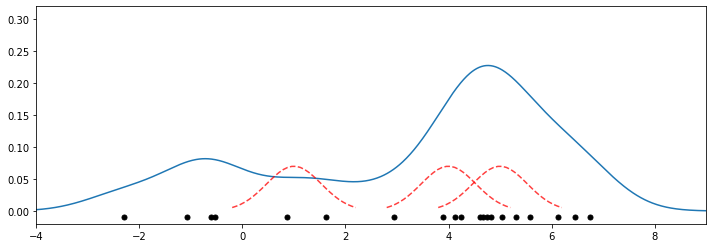

In [5]:
from sklearn.neighbors import KernelDensity
from matplotlib import pyplot as plt

kde = KernelDensity(kernel='gaussian', bandwidth=0.75).fit(X) # fit a KDE model
x_ticks = np.linspace(-5, 10, 1000)[:, np.newaxis] # choose 1000 points on x-axis
log_density = kde.score_samples(x_ticks) # compute density at 1000 points
gaussian_kernel = lambda z : lambda x: np.exp(-np.abs(x-z)**2/(0.75**2)) # gaussian kernel
kernel_linspace = lambda x : np.linspace(x-1.2,x+1.2,30)

plt.figure(figsize=(12,4))
plt.plot(x_ticks[:, 0], np.exp(log_density)) # plot the density estimate
plt.plot(X[:, 0], np.full(X.shape[0], -0.01), '.k', markersize=10) # plot the points in X
plt.plot(kernel_linspace(4), 0.07*gaussian_kernel(4)(kernel_linspace(4)), '--', color='r', alpha=0.75)
plt.plot(kernel_linspace(5), 0.07*gaussian_kernel(5)(kernel_linspace(5)), '--', color='r', alpha=0.75)
plt.plot(kernel_linspace(1), 0.07*gaussian_kernel(1)(kernel_linspace(1)), '--', color='r', alpha=0.75)
plt.xlim(-4, 9)
plt.ylim(-0.02, 0.32)

Pros of KDE:
* Can approximate any data distribution arbtrarily well.

Cons:
* Need to store entire dataset to make queries, which is computationally prohibitive.
* Number of data needed scale exponentially with dimension ("curse of dimensionality").

# Clustering

Clustering is the problem of identifying distinct components in the data.
* A cluster $C_k \subseteq \mathcal{X}$ can be thought of as a subset of the space $\mathcal{X}$.
* Datapoints in a cluster are more similar to each other than to points in other clusters

We can perform clustering via density estimation with a GMM model.
$$P_\theta (x,z) = P_\theta (x | z) P_\theta (z)$$
* $z \in \mathcal{Z} = \{1,2,\ldots,K\}$ is discrete and follows a categorical distribution $P_\theta(z=k) = \phi_k$.
* $x \in \mathbb{R}$ is continuous; conditioned on $z=k$, it follows a Normal distribution $P_\theta(x | z=k) = \mathcal{N}(\mu_k, \Sigma_k)$.

The parameters $\theta$ are the $\mu_k, \Sigma_k, \phi_k$ for all $k=1,2,\ldots,K$.

Intuitively, a GMM represents well the two clusters in the geyser dataset:

Raw data | Single Gaussian | Mixture of Gaussians
--|--|---
<img width=90% src="img/oldfaithful_v2.png"> | <img width=90% src="img/oldfSingle_v2.png"> | <img width=90% src="img/oldfMOG_v2.png">

<center><img width=40% src="img/algorithms11u.png"></center>

<center><img width=40% src="img/algorithms12u.png"></center>

# Linear Dimensionality Reduction

Suppose $\mathcal{X} = \mathbb{R}^d$ and $\mathcal{Z} = \mathbb{R}^p$ for some $p < d$. The transformation 
$$f_\theta : \mathcal{X} \to \mathcal{Z}$$
is a linear function with parameters $\theta = W \in \mathbb{R}^{d \times p}$:
$$ z = f_\theta(x) = W^\top \cdot x. $$
The latent dimension $z$ is obtained from $x$ via a matrix $W$.

Even linear dimensionality reduction is powerful. Here, in uncovers the geography of European countries from only DNA data

<center><img width=50% src="img/dna_map.jpg"></center>

Principal component analysis (PCA) assumes that 
* The projection subspace is spanned by a set of orthonormal vectors $w^{(1)}, w^{(2)}, \ldots, w^{(p)}$
* The data $x$ are approximated by a linear combination $\tilde x$ of the $w^{(k)}$
$$ x \approx \tilde x = \sum_{k=1}^p w^{(k)} z_k = W z $$
for some $z \in \mathcal{X}$ that are the coordinates of $\tilde x$ in the basis $W$.

In this example, the data lives in a lower-dimensional 2D plane within a 3D space (image [credit](https://doc.plob.org/machine_learning/14_Dimensionality_Reduction.html)).

<center><img width=50% src="img/pca_example_plane.png"></center>

A natural objective is to minimize the reconstruction error
$$J_1(W) = \sum_{i=1}^n \| x^{(i)} - \tilde x^{(i)} \|_2^2 =\sum_{i=1}^n \| x^{(i)} - W W^\top x^{(i)} \|_2^2$$
between each input $x^{(i)}$ and its approximate reconstruction $$\tilde x^{(i)} = W \cdot z^{(i)} = W\cdot W^\top \cdot x^{(i)}.$$

The variance objective is simply
$$J_2(W) = \hat{\mathbb{E}}\left[ \| W^\top x \|^2 \right] = \frac{1}{n} \sum_{i=1}^n \| W^\top x^{(i)}\|_2^2.$$

The two are equivalent (figure credit: [Alex Williams](http://alexhwilliams.info/itsneuronalblog/2016/03/27/pca/))

<center><img width=80% src="img/pca_two_views.png"></center>

Recall that the positive semidefinite matrix $\hat \Sigma = \frac{1}{n} X^\top X$ has an *eigendecomposition*
$$\hat \Sigma = Q \Lambda Q^\top = \sum_{j=1}^d \lambda_j q^{(j)} (q^{(j)})^\top. $$
* $Q$ is a matrix whose columns are orthonormal eigenvectors $q^{(j)}$ for $j = 1,2,\ldots,d$.
* $\Lambda$ is a diagonal matrix of positive eigenvalues $\lambda_1 \geq \lambda_2 \geq \ldots \geq \lambda_d$.

The variance objective can be written as follows.
$$\max_w J(w) = \max_w \sum_{j=1}^d \lambda_j (w^\top q^{(j)})^2$$
Its optimum is attained by the top eigenvector $w = q^{(1)}$. The optimum is $J( q^{(1)}) = \lambda_1$.

More generally when $p>1$, our objective is
$$J(W) = \sum_{k=1}^p \sum_{j=1}^d \lambda_j ((w^{(k)})^\top q^{(j)})^2$$
where $W$ is a matrix of orthonormal columns $w^{(1)}, w^{(2)}, \ldots, w^{(p)}$.

<center><img width=40% src="img/algorithms13u.png"></center>

<left><img width=25% src="img/cornell_tech2.svg"></left>
# Part 3: Machine Learning in Practice

We conclude with high-level considerations about how to apply machine learning.

Machine learning is an interative process. At each iteration, the machine learning engineer needs to make a number of decisions.

* Add more data?
* Train the algorithm for longer?
* Use a bigger model?
* Add regularization?
* Add new features?

We prioritize these using a principled process (more on this in a few weeks).

# Datasets for Model Development

When developing machine learning models, it is customary to work with three datasets:
* __Training set__: Data on which we train our algorithms.
* __Development set__ (validation or holdout set): Data used for tuning algorithms.
* __Test set__: Data used to evaluate the final performance of the model.

# Model Development Workflow

The typical way in which these datasets are used is:
1. __Training:__ Try a new model and fit it on the training set.

2. __Model Selection__: Estimate performance on the development set using metrics. Based on results, try a new model idea in step #1.

3. __Evaluation__: Finally, estimate real-world performance on test set.

# How To Decide Which Algorithm to Use

One factor is how much data you have. In the __small data__ (<10,000) regime, consider:
* Linear models with hand-crafted features (LASSO, LR, NB, SVMs)
* Kernel methods often work best (e.g., SVM + RBF kernel)
* Non-parametric methods (kernels, nearest neighbors) are also powerful

In the following lectures, we will see algorithms for the __big data__ regime.

Some additional advice:
* If interpretability matters, use decision trees or LASSO.
* When uncertainty estimates are important use probabilistic methods.
* If you know the data generating process, use generative models.